### Library imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data into Pandas DataFrames

In [2]:
data_path = "Data"

files = {
    "users": f"{data_path}/users.csv",
    "movies": f"{data_path}/movies.csv",
    "songs": f"{data_path}/songs.csv",
    "interactions": f"{data_path}/interactions.csv",
    "tags": f"{data_path}/tags.csv",
    "movie_tags": f"{data_path}/movie_tags.csv",
    "song_tags": f"{data_path}/song_tags.csv",
    "user_movie_tags": f"{data_path}/user_movie_tags.csv",
    "user_song_tags": f"{data_path}/user_song_tags.csv",
    "contexts": f"{data_path}/contexts.csv"
}

data = {
    "users": pd.read_csv(files["users"], header=0),
    "movies": pd.read_csv(files["movies"], header=0),
    "songs": pd.read_csv(files["songs"], header=0),
    "interactions": pd.read_csv(files["interactions"], header=0),
    "tags": pd.read_csv(files["tags"], header=0),
    "movie_tags": pd.read_csv(files["movie_tags"], header=0),
    "song_tags": pd.read_csv(files["song_tags"], header=0),
    "user_movie_tags": pd.read_csv(files["user_movie_tags"], header=0),
    "user_song_tags": pd.read_csv(files["user_song_tags"], header=0),
    "contexts": pd.read_csv(files["contexts"], header=0)
}

## General information about the dataset
### Number of available to rate media content

In [3]:
songs_count = data["songs"].id.count()
movies_count = data["movies"].id.count()

print(f"Total number of songs to rate: {songs_count}")
print(f"Total number of movie trailers to rate: {movies_count}")

Total number of songs to rate: 35
Total number of movie trailers to rate: 35


### Number of users and interactions

In [4]:
users_count = data["users"].id.count()
interactions_count = data["interactions"].id.count()

print(f"Total number of users: {users_count}")
print(f"Total number of user interactions: {interactions_count}")

Total number of users: 101
Total number of user interactions: 2526


### User Interaction Distribution

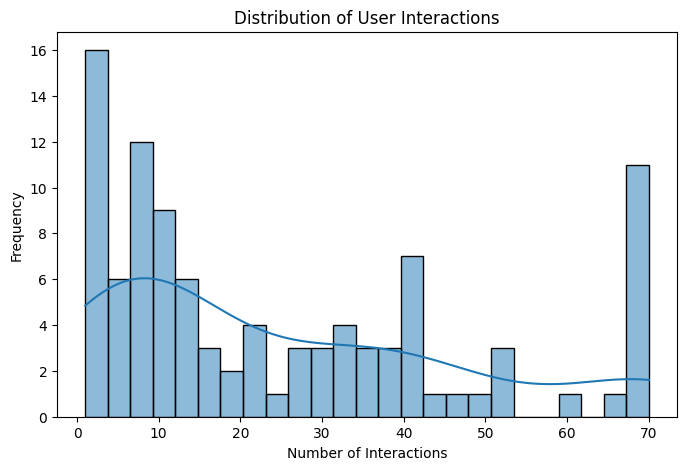

In [5]:
# Frequency plot (histogram) for the number of interactions per user
plt.figure(figsize=(8,5))
user_interaction_counts = data["interactions"].groupby("user_id").size()
sns.histplot(user_interaction_counts, bins=25, kde=True)
plt.title("Distribution of User Interactions")
plt.xlabel("Number of Interactions")
plt.ylabel("Frequency")
plt.show()

### Average number of interactions per user

In [6]:
# Calculate and print average number of interactions per user
avg_interactions_per_user = data["interactions"].groupby("user_id").size().mean()
print(f"Average number of interactions per user: {avg_interactions_per_user:.2f}")

Average number of interactions per user: 25.01


### Available tags

In [7]:
# Print distinct tags for movies and songs
print("Available Movie Tags:")
print(data["movie_tags"].merge(data["tags"], left_on="tag_id", right_on="id")["name"].unique())
print("\nAvailable Song Tags:")
print(data["song_tags"].merge(data["tags"], left_on="tag_id", right_on="id")["name"].unique())

Available Movie Tags:
['sci-fi' 'action' 'fantasy' 'comedy' 'romance' 'thriller' 'animation'
 'drama' 'horror' 'criminal' 'documentary' 'adventure' 'family']

Available Song Tags:
['pop' 'film' 'rock' 'electronic' 'jazz' 'metal' 'classical' 'hip-hop']


### Tags assignment distribution to media content and users' general preferences

In [8]:
def annotate_bars(ax):
    for i, p in enumerate(ax.patches):
        ax.text(p.get_x() + p.get_width() / 2, p.get_height() - (p.get_height() * 0.1), f'{int(p.get_height())}',
                ha='center', fontsize=12, color='black', weight='bold')

In [9]:
# Count occurrences of tags
movie_tag_counts = data["movie_tags"].merge(data["tags"], left_on="tag_id", right_on="id")["name"].value_counts()
song_tag_counts = data["song_tags"].merge(data["tags"], left_on="tag_id", right_on="id")["name"].value_counts()
user_movie_tag_counts = data["user_movie_tags"].merge(data["tags"], left_on="tag_id", right_on="id")["name"].value_counts()
user_song_tag_counts = data["user_song_tags"].merge(data["tags"], left_on="tag_id", right_on="id")["name"].value_counts()

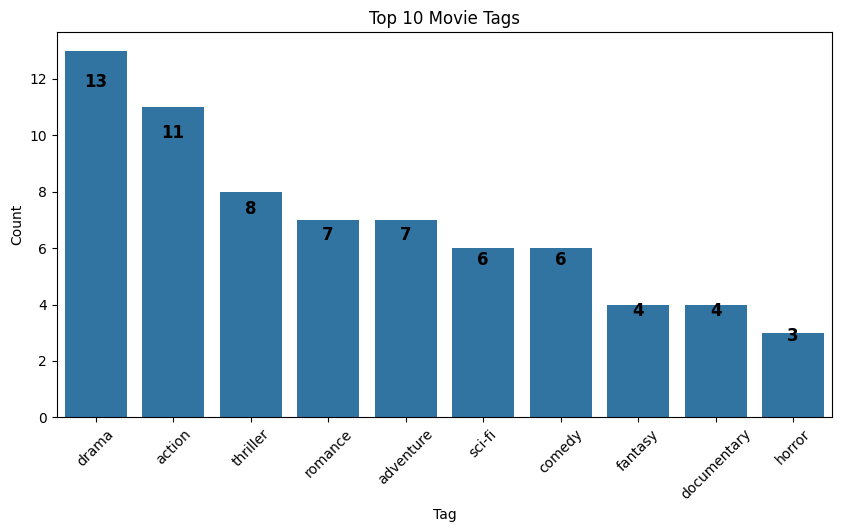

In [10]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=movie_tag_counts.index[:10], y=movie_tag_counts.values[:10])
plt.title("Top 10 Movie Tags")
plt.xlabel("Tag")
plt.ylabel("Count")
plt.xticks(rotation=45)
annotate_bars(ax)
plt.show()

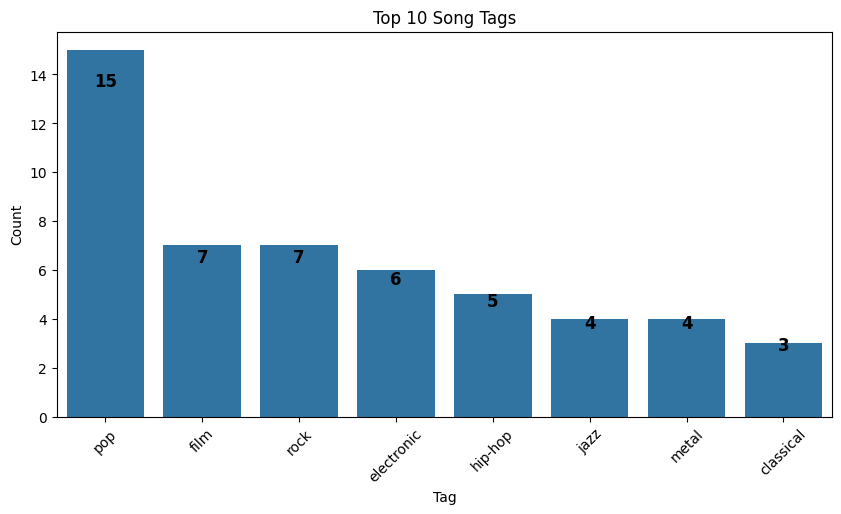

In [11]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=song_tag_counts.index[:10], y=song_tag_counts.values[:10])
plt.title("Top 10 Song Tags")
plt.xlabel("Tag")
plt.ylabel("Count")
plt.xticks(rotation=45)
annotate_bars(ax)
plt.show()

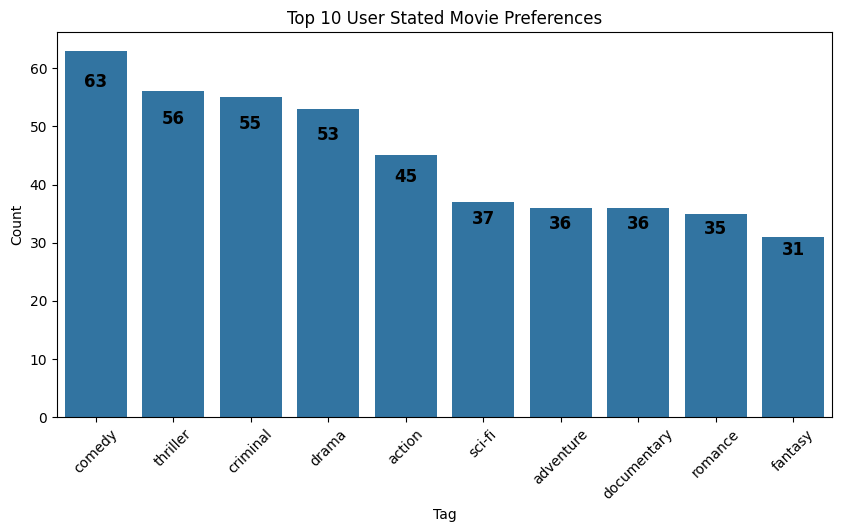

In [12]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=user_movie_tag_counts.index[:10], y=user_movie_tag_counts.values[:10])
plt.title("Top 10 User Stated Movie Preferences")
plt.xlabel("Tag")
plt.ylabel("Count")
plt.xticks(rotation=45)
annotate_bars(ax)
plt.show()

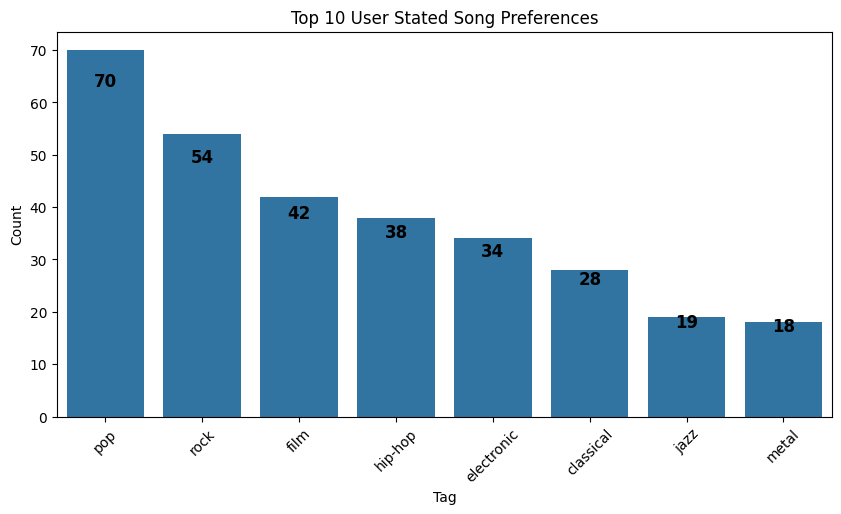

In [13]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=user_song_tag_counts.index[:10], y=user_song_tag_counts.values[:10])
plt.title("Top 10 User Stated Song Preferences")
plt.xlabel("Tag")
plt.ylabel("Count")
plt.xticks(rotation=45)
annotate_bars(ax)
plt.show()

### Users' gender distribution

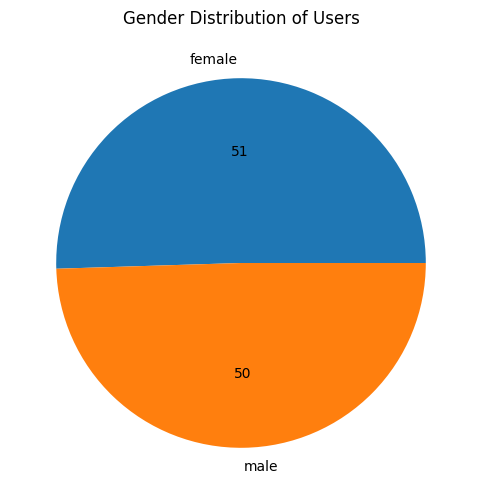

In [14]:
# Gender distribution pie chart
plt.figure(figsize=(6,6))
gender_counts = data["users"].gender.value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda p: f'{int(p * sum(gender_counts) / 100)}')
plt.title("Gender Distribution of Users")
plt.show()

### Comparison on number of interactions per media content

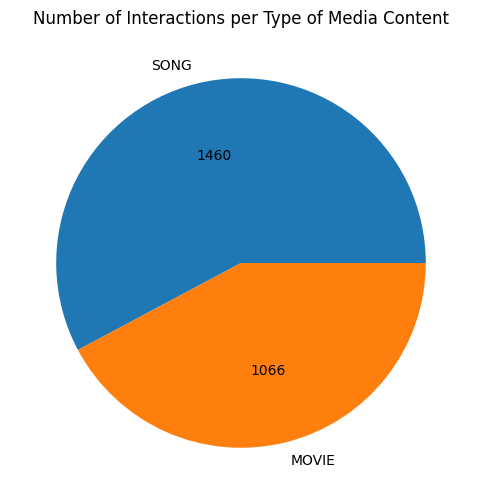

In [15]:
# Interaction type count pie chart
plt.figure(figsize=(6,6))
interaction_counts = data["interactions"].domain.value_counts()
plt.pie(interaction_counts, labels=interaction_counts.index, autopct=lambda p: f'{int(p * sum(interaction_counts) / 100)}')
plt.title("Number of Interactions per Type of Media Content")
plt.show()

### General statistics on camera recordings aquisition

In [16]:
total_camera_recordings = data["contexts"][data["contexts"].camera_view_id != -1].camera_view_id.count()
print(f"Total number of camera recordings: {total_camera_recordings}")

Total number of camera recordings: 521


In [17]:
# Count distinct users who have interactions linked to camera recordings
users_with_camera_interactions = data["users"].merge(
    data["interactions"], left_on="id", right_on="user_id"
).merge(
    data["contexts"], left_on="context_id", right_on="id"
)

users_with_camera_count = users_with_camera_interactions[users_with_camera_interactions["camera_view_id"] != -1]["user_id"].nunique()
print(f"Number of distinct users with camera interactions: {users_with_camera_count}")


Number of distinct users with camera interactions: 24


### Distribution of User Interactions Across Different Contexts

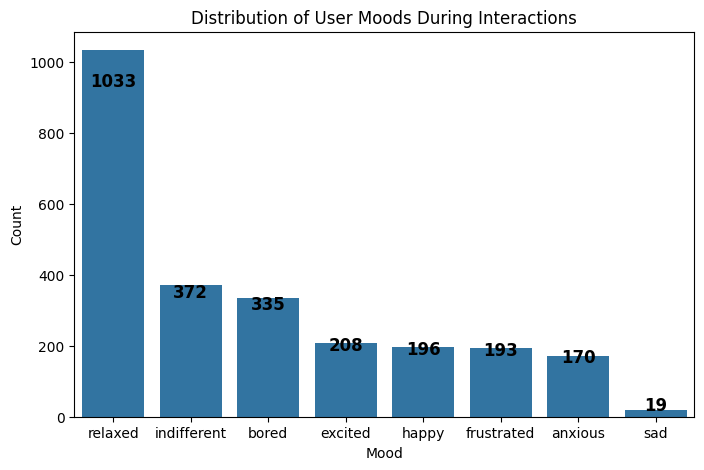

In [18]:
mood_counts = data["contexts"]["mood"].value_counts()

plt.figure(figsize=(8,5))
ax = sns.barplot(x=mood_counts.index, y=mood_counts.values)
plt.title("Distribution of User Moods During Interactions")
plt.xlabel("Mood")
plt.ylabel("Count")
annotate_bars(ax)
plt.show()


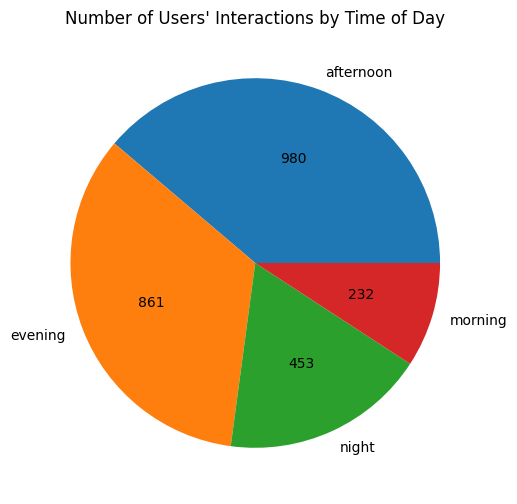

In [19]:
# User activity by time of day pie chart
plt.figure(figsize=(6,6))
time_of_day_counts = data["contexts"]["time_of_day"].value_counts()
plt.pie(time_of_day_counts, labels=time_of_day_counts.index, autopct=lambda p: f'{int(p * sum(time_of_day_counts) / 100)}')
plt.title("Number of Users' Interactions by Time of Day")
plt.show()


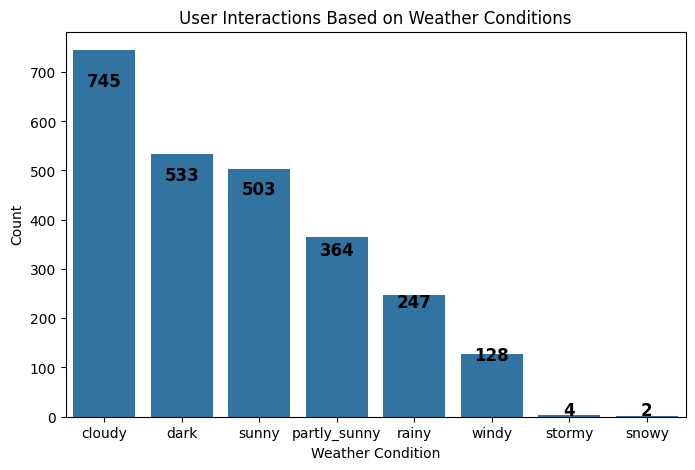

In [20]:
weather_counts = data["contexts"]["weather"].value_counts()

plt.figure(figsize=(8,5))
ax = sns.barplot(x=weather_counts.index, y=weather_counts.values)
plt.title("User Interactions Based on Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
annotate_bars(ax)
plt.show()


### Best top 10 average ratings for media content

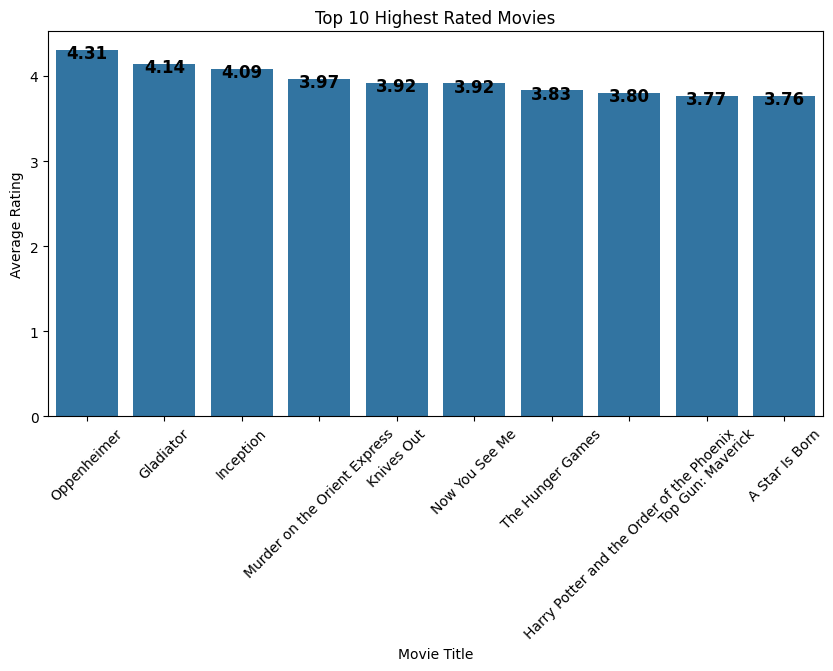

In [21]:
# Average movie ratings
avg_movie_ratings = data["interactions"].groupby("movie_id")["rating"].mean()
top_rated_movies = data["movies"][data["movies"]["id"].isin(avg_movie_ratings.index)].copy()
top_rated_movies["average_rating"] = top_rated_movies["id"].map(avg_movie_ratings)

plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_rated_movies.sort_values("average_rating", ascending=False).head(10)["title"],
                 y=top_rated_movies.sort_values("average_rating", ascending=False).head(10)["average_rating"])
plt.title("Top 10 Highest Rated Movies")
plt.xlabel("Movie Title")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
for i, v in enumerate(top_rated_movies.sort_values("average_rating", ascending=False).head(10)["average_rating"]):
    ax.text(i, v - 0.1, f"{v:.2f}", ha='center', fontsize=12, color='black', weight='bold')
plt.show()


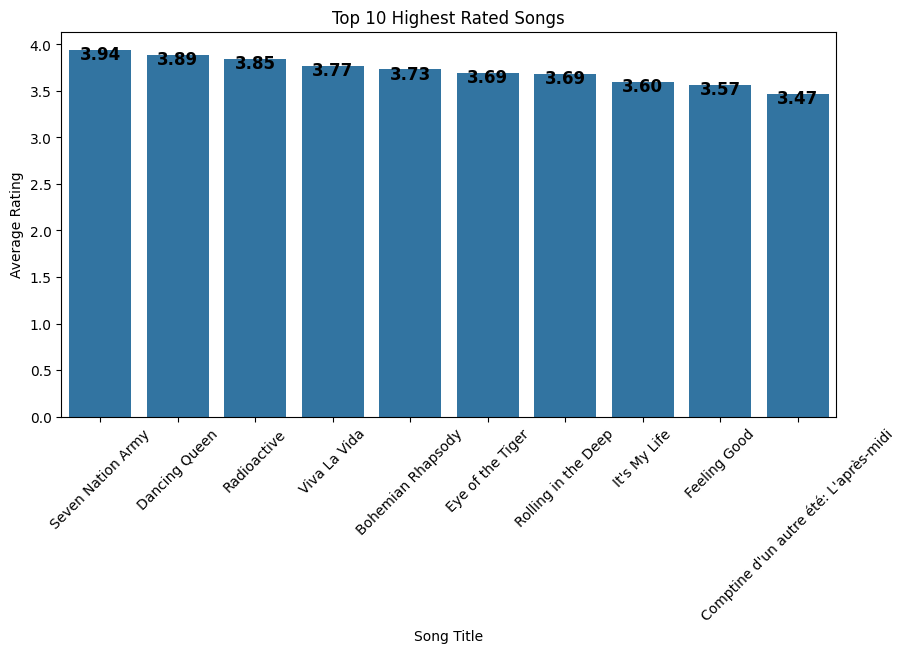

In [22]:
# Average song ratings
avg_song_ratings = data["interactions"].groupby("song_id")["rating"].mean()
top_rated_songs = data["songs"][data["songs"]["id"].isin(avg_song_ratings.index)].copy()
top_rated_songs["average_rating"] = top_rated_songs["id"].map(avg_song_ratings)

plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_rated_songs.sort_values("average_rating", ascending=False).head(10)["title"],
                 y=top_rated_songs.sort_values("average_rating", ascending=False).head(10)["average_rating"])
plt.title("Top 10 Highest Rated Songs")
plt.xlabel("Song Title")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
for i, v in enumerate(top_rated_songs.sort_values("average_rating", ascending=False).head(10)["average_rating"]):
    ax.text(i, v - 0.1, f"{v:.2f}", ha='center', fontsize=12, color='black', weight='bold')
plt.show()